# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 02:56:56--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 02:56:56--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.2’

c

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
replace customer_shopping_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
print("Información del DataFrame:")
df.info()

print("\nEstadísticas descriptivas del DataFrame:")
df.describe()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB

Estadísticas descriptivas del DataFrame:


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='age', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='quantity', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

las mas importantes son: edad, el genero y el tipo producto, nos podria  ayudar a identificar difrentes segmentos, se utilizan elementos sobre todo demograficos pero muy importantes para segmentar nuestros clientes
---



## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print("Valores nulos en el DataFrame:")
print(df.isnull().sum())

print("\nDuplicados en el DataFrame:")
print(df.duplicated().sum())

Valores nulos en el DataFrame:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
age_group         0
dtype: int64

Duplicados en el DataFrame:
0


no hay valores duplicados, ni valores nulos


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:
df['total_value'] = df['quantity'] * df['price']

print("Vista rápida del DataFrame con la nueva variable:")

df.head(10)

Vista rápida del DataFrame con la nueva variable:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,7502.00
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul,1200.32
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,2700.72
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon,1200.32


otra variable podria ser el genero con la cantidad o el lugar de compra con la cantidad


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

Text(0.5, 1.0, 'Boxplot')

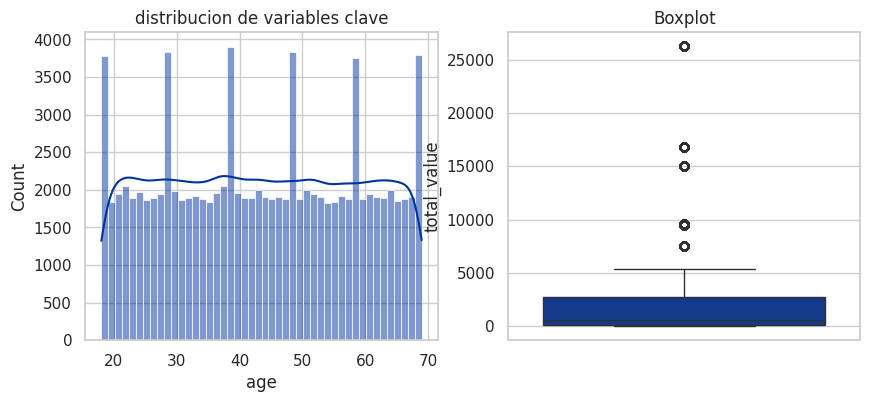

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True,)
plt.title(f'distribucion de variables clave')

plt.subplot(1,2,2)
sns.boxplot(y=df['total_value'])
plt.title(f'Boxplot')

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [ ]:
import pandas as pd

# Download and unzip the data if it's not already present
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
!unzip -o customer_shopping_data.csv.zip

# Reload the dataframe as it was not defined in the current runtime
df = pd.read_csv('customer_shopping_data.csv')

bins_edad = [0, 18, 30, 50, 100]
labels_edad = ['Joven', 'Adulto Joven', 'Adulto Mayor', 'Anciano']
df['age_group'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad, right=False)
print(df.head())

--2025-10-22 02:23:29--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 02:23:30--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [ ]:
df['totalprice'] = df['quantity'] * df['price']

In [ ]:
category_avg = df.groupby('category')['totalprice'].mean().sort_values(ascending=False)
payment_avg = df.groupby('payment_method')['totalprice'].mean().sort_values(ascending=False)
mall_avg = df.groupby('shopping_mall')['totalprice'].mean().sort_values(ascending=False)
print("Ventas por categoría:\n", category_avg)
print("\nVentas por método de pago:\n", payment_avg)
print("\nVentas por centro comercial:\n", mall_avg)

Ventas por categoría:
 category
Technology         11581.735388
Shoes               6632.793649
Clothing            3305.500364
Cosmetics            449.947864
Toys                 394.609521
Books                167.547260
Souvenir             127.190368
Food & Beverage       57.494251
Name: totalprice, dtype: float64

Ventas por método de pago:
 payment_method
Cash           2538.579500
Credit Card    2521.460129
Debit Card     2519.867895
Name: totalprice, dtype: float64

Ventas por centro comercial:
 shopping_mall
Emaar Square Mall    2578.694718
Mall of Istanbul     2550.894132
Kanyon               2550.281547
Viaport Outlet       2548.095181
Zorlu Center         2542.079570
Cevahir AVM          2533.588099
Istinye Park         2517.005181
Metropol AVM         2497.777108
Forum Istanbul       2487.148017
Metrocity            2485.030133
Name: totalprice, dtype: float64


el criterio de segmentación que más impacto tiene es la categoría del producto porque muestra directamente qué le interesa o qué necesita el cliente
Y si se combina con el método de pago y el centro comercial, se puede ver mejor qué tipo de productos compran los clientes más valiosos y en qué lugares lo hacen


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

/tmp/ipython-input-228023016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'category']).size().unstack().plot(kind='bar', stacked=True)
/tmp/ipython-input-228023016.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['age_group', 'category']).size().unstack()


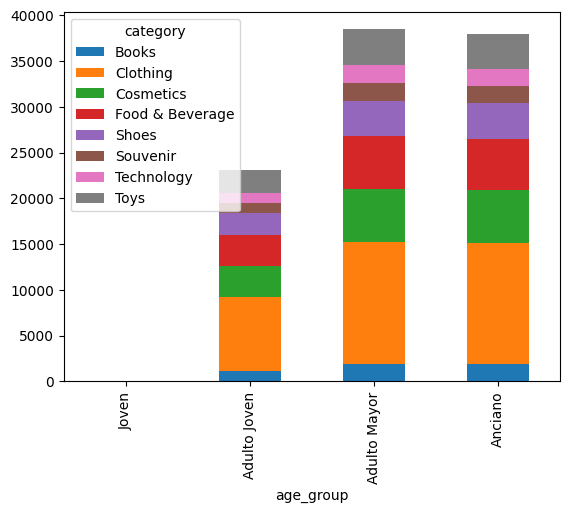

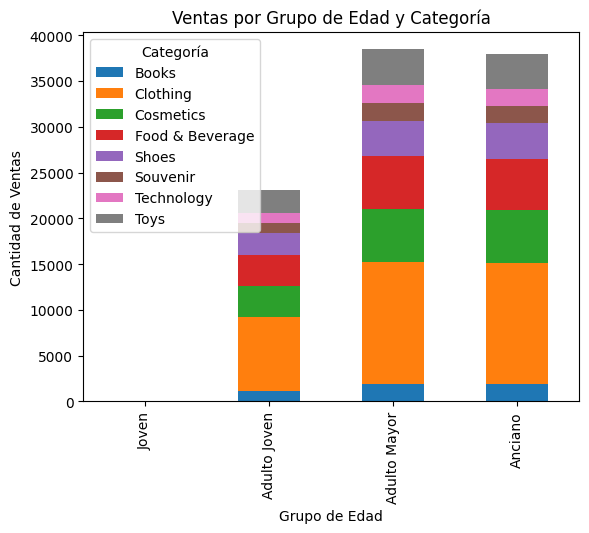

In [ ]:
import matplotlib.pyplot as plt
df.groupby(['age_group', 'category']).size().unstack().plot(kind='bar', stacked=True)
grouped_data = df.groupby(['age_group', 'category']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Ventas por Grupo de Edad y Categoría')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Ventas')
plt.legend(title="Categoría")
plt.show()

las relaciones entre el grupo de edad y la categoría del producto ayudan a definir segmentos de alto valor, porque muestran qué tipo de productos prefiere cada edad.
Por ejemplo, si los clientes entre 25 y 34 años compran más tecnología con tarjeta de crédito, se les podrían ofrecer promociones o planes de financiamiento específicos para ese tipo de producto

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64
category_grouped
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


/tmp/ipython-input-180730690.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'category_grouped']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))


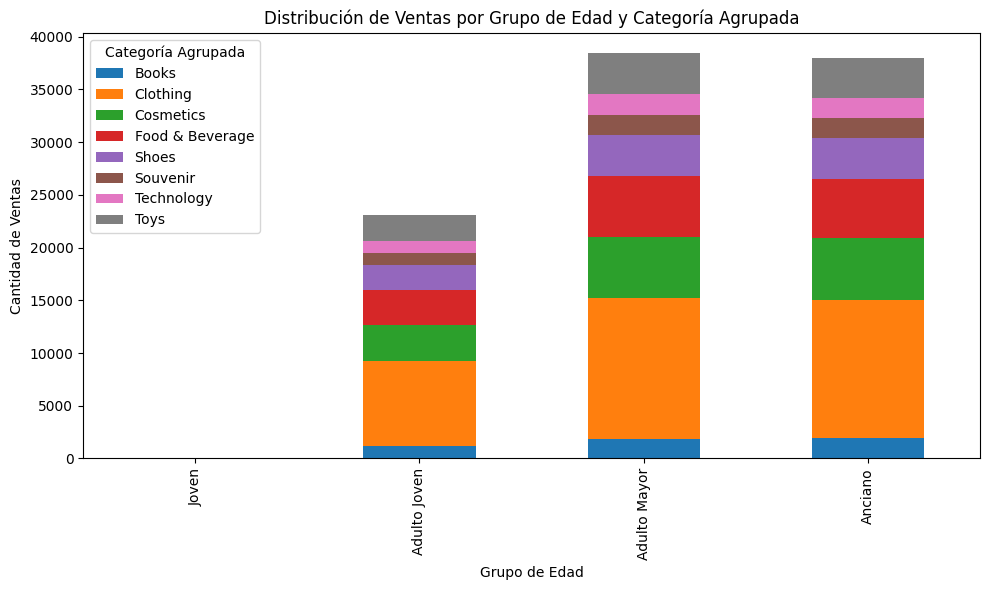

In [ ]:
print(df['category'].value_counts())
threshold = 0.05 * len(df)
df['category_grouped'] = df['category'].apply(
    lambda x: x if df['category'].value_counts()[x] > threshold else 'Other')
print(df['category_grouped'].value_counts())
df.groupby(['age_group', 'category_grouped']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de Ventas por Grupo de Edad y Categoría Agrupada')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Categoría Agrupada')
plt.tight_layout()
plt.show()


Agruparía las categorías con pocas ventas, como Souvenir o Books, dentro de “Otros” para hacer el análisis más simple


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

/tmp/ipython-input-3461549764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['age_group', 'category_grouped', 'shopping_mall']).size().unstack()


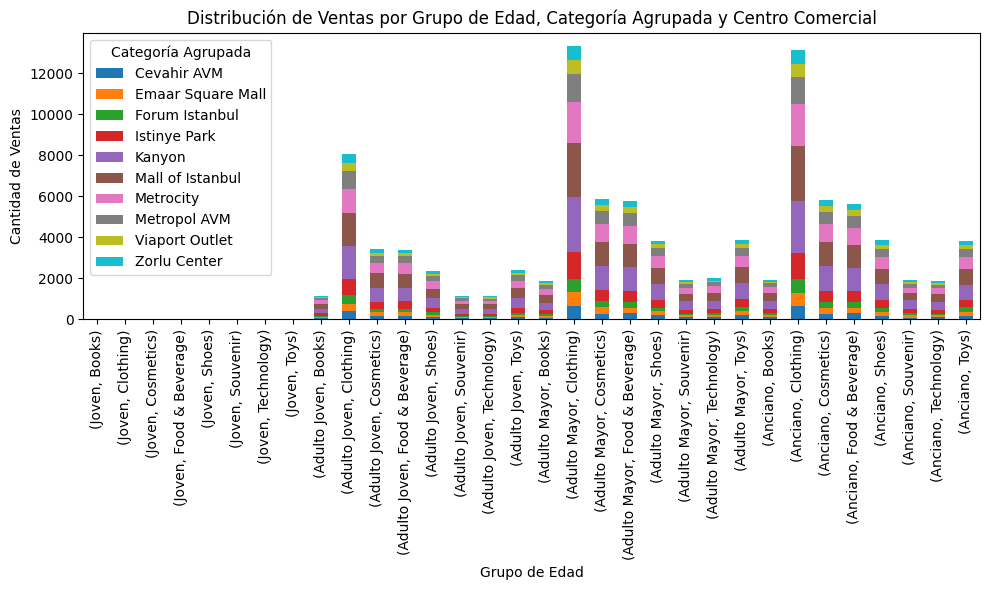

In [54]:
grouped_data = df.groupby(['age_group', 'category_grouped', 'shopping_mall']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distribución de Ventas por Grupo de Edad, Categoría Agrupada y Centro Comercial')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Categoría Agrupada')
plt.tight_layout()
plt.show()

La combinación de la edad y la frecuencia de compra es el perfil más completo porque nos permite entender y ver  quiénes son los clientes y cómo compran

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [81]:
segmentos = df.groupby(['age_group', 'category_grouped', 'shopping_mall']).agg(
    avg_totalprice=('totalprice', 'mean'),
    count=('totalprice', 'count')
).reset_index()

segmentos = segmentos.sort_values(by='avg_totalprice', ascending=False)
segmentos.to_csv('segmentos.csv', index=False)
segmentos.head()


/tmp/ipython-input-1784609574.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentos = df.groupby(['age_group', 'category_grouped', 'shopping_mall']).agg(


,age_group,category_grouped,shopping_mall,avg_totalprice,count
148,Adulto Joven,Technology,Viaport Outlet,13582.258065,62
309,Anciano,Technology,Zorlu Center,12707.692308,78
141,Adulto Joven,Technology,Emaar Square Mall,12526.315789,57
224,Adulto Mayor,Technology,Kanyon,12446.143959,389
220,Adulto Mayor,Technology,Cevahir AVM,12412.105263,95


El segmento que más se destaca es el de adultos con alto nivel de gasto en centros comerciales premium, sobre todo en categorías como tecnología y moda.
Para aprovecharlo, se pueden implementar estrategias como programas de fidelización exclusivos, descuentos personalizados y campañas en redes sociales o por correo enfocadas en productos de alta gama y tendencias tecnológicas.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Los segmentos con mayor potencial son los adultos jóvenes y los adultos que compran con frecuencia en categorías como moda y tecnología, sobre todo en centros comerciales premium.

Las estrategias más efectivas serían programas de fidelización, promociones exclusivas y campañas personalizadas en redes sociales.

En cuanto a la influencia del producto y el centro comercial, los espacios premium impulsan un gasto más alto, especialmente en productos de tendencia y tecnología. Por eso, vale la pena enfocar los esfuerzos de marketing en esos lugares.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

El equipo de marketing debería enfocarse en tres o cuatro segmentos principales, dando prioridad a aquellos que tengan un valor promedio alto y una frecuencia de compra constante.

En cuanto al presupuesto, se recomienda invertir más en los segmentos de alto valor y aplicar promociones o descuentos para reactivar a los clientes con baja frecuencia de compra.

Los indicadores clave serían el ticket promedio, la frecuencia de compra, la tasa de recompra y el ROI.

En conclusión, el segmento con mayor potencial es el de adultos jóvenes con alta frecuencia de compra en moda y tecnología.
La estrategia ideal incluye campañas digitales personalizadas, retargeting y beneficios por fidelización.
Para el monitoreo, se debe seguir de cerca la evolución del ticket promedio y la recurrencia de compra.